In [3]:
import zipfile
import os

# Define the path of the ZIP file
zip_file_path = 'C:\\Users\\HP\\Downloads\\heart+disease.zip'

# Define the folder to extract the contents to
extracted_folder = 'C:\\Users\\HP\\Downloads\\heart_disease_extracted'

# Create the folder if it doesn't exist
if not os.path.exists(extracted_folder):
    os.makedirs(extracted_folder)

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

print("ZIP file extracted successfully!")


ZIP file extracted successfully!


In [4]:
import os

# Path to the extracted folder
extracted_folder = 'C:\\Users\\HP\\Downloads\\heart_disease_extracted'

# List all files in the extracted folder
files = os.listdir(extracted_folder)
print(files)


['ask-detrano', 'bak', 'cleve.mod', 'cleveland.data', 'costs', 'heart-disease.names', 'hungarian.data', 'Index', 'long-beach-va.data', 'new.data', 'processed.cleveland.data', 'processed.hungarian.data', 'processed.switzerland.data', 'processed.va.data', 'reprocessed.hungarian.data', 'switzerland.data', 'WARNING']


In [1]:
import pandas as pd
import os

# File path for the dataset
file_path = os.path.join('C:\\Users\\HP\\Downloads\\heart_disease_extracted', 'processed.cleveland.data')

# Load the dataset (assuming comma-separated values)
try:
    df = pd.read_csv(file_path, header=None)
    print(df.head())  # Display the first few rows
except Exception as e:
    print(f"Error loading the file: {e}")


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [2]:
import pandas as pd

# Assuming `df` is your DataFrame
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# Check the updated DataFrame
print(df.head())


    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [3]:
df.to_csv('heart_disease.csv', index=False)
print("Dataset saved as heart_disease.csv")


Dataset saved as heart_disease.csv


     0    1    2         3      4    5        6        7      8        9   \
0   age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak   
1  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
2  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
3  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
4  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   

      10   11    12      13  
0  slope   ca  thal  target  
1    3.0  0.0   6.0       0  
2    2.0  3.0   3.0       2  
3    2.0  2.0   7.0       1  
4    3.0  0.0   3.0       0  
Accuracy: 0.6
Classification Report:
               precision    recall  f1-score   support

         0.0       0.80      0.97      0.88        36
         1.0       0.00      0.00      0.00         9
         2.0       0.14      0.20      0.17         5
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00     

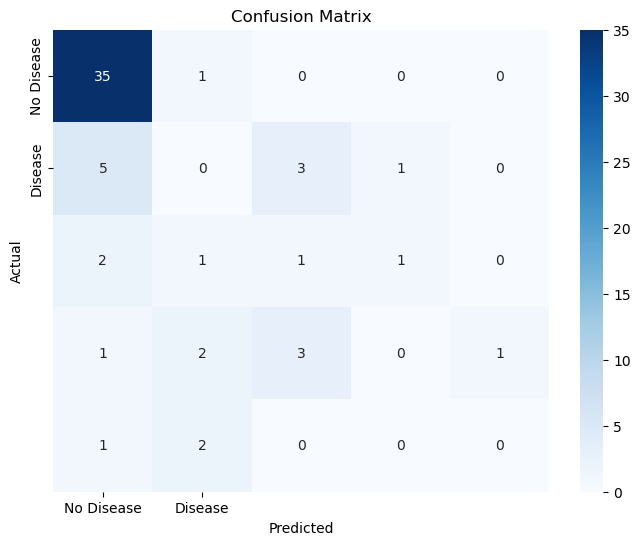

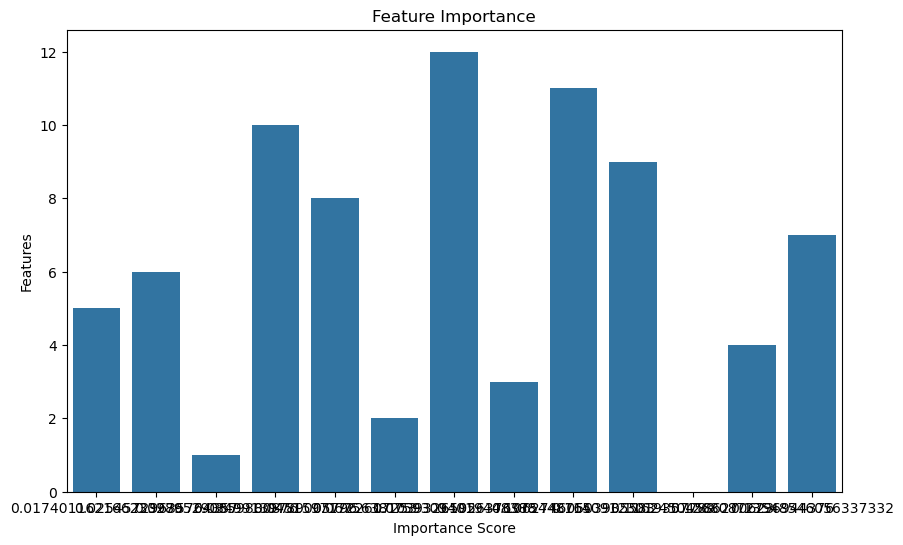

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("heart_disease.csv", header=None)

# Inspecting the dataset
print(data.head())

# Replace '?' with NaN
data.replace('?', np.nan, inplace=True)

# Convert all columns to numeric (errors='coerce' ensures non-numeric data becomes NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Feature and target selection
X = data.iloc[:, :-1]  # Features (all columns except the last)
y = data.iloc[:, -1]   # Target (last column)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance Visualization
feature_importance = model.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
